In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyunicorn.timeseries import RecurrenceNetwork, RecurrencePlot

### Bandpass Filtering

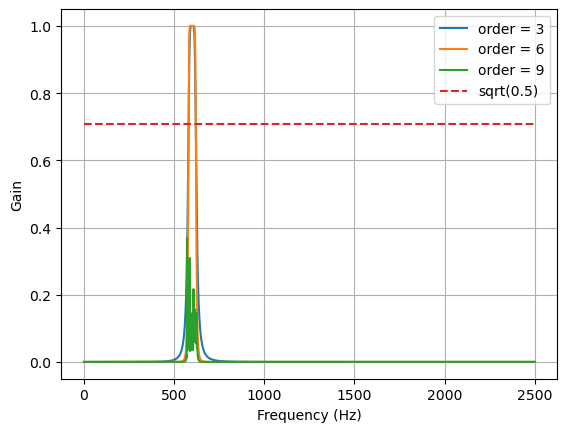

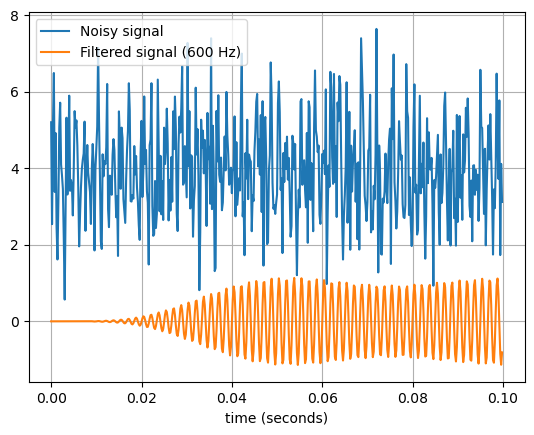

In [154]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return signal.butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = 5000.0
lowcut = 580
highcut = 620

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = signal.freqz(b, a, fs=fs, worN=2000)
    plt.plot(w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Filter a noisy signal.
T = 0.1
nsamples = T * fs
t = np.arange(0, nsamples) / fs
x = np.full_like(t, 4)
x += np.sin(2*np.pi*600*t)
x += np.random.normal(size=len(t))
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()